In [1]:
from pylab import *
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, plot_confusion_matrix, classification_report

# Analysis Utilities

In [2]:
def plot_dataset(title, features, target):
  dataset = features.assign(y=target)
  splitted_dataset = dataset.groupby('y')

  features_0 = splitted_dataset.get_group(0)
  features_1 = splitted_dataset.get_group(1)

  plt.scatter(features_0.x1, features_0.x2, c="b", marker="o", label="0")
  plt.scatter(features_1.x1, features_1.x2, c="r", marker="x", label="1")
  plt.title(title)
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.legend()
  plt.show()

def plot_decision_boundary(classifier, features, target):
  fig, ax = plt.subplots()

  h = 0.02
  x_min, x_max = features.x1.min() - 0.04, features.x1.max() + 0.04
  y_min, y_max = features.x2.min() - 0.04, features.x2.max() + 0.04
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

def print_analytics(classifier, features, target):

  predicted_target = model.predict(features)

  print('F1 Score: ', f1_score(target, predicted_target))
  print('Accuracy: ', accuracy_score(target, predicted_target))
  print('ROC AUC score: ', roc_auc_score(target, predicted_target))
  print('\n\n')
  print('Classification Report', classification_report(target, predicted_target))

# Import Dataset

In [3]:
data = pd.read_csv("dataset.csv")
data.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


# Generate/Plot 3 Datasets

## Plot Whole Dataset Plot

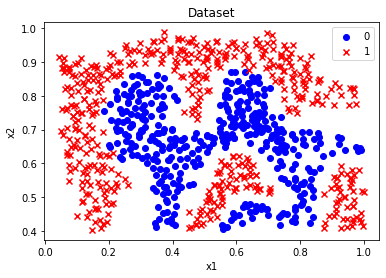

In [4]:
plot_dataset("Dataset", data.drop('y', axis='columns'), data['y'])

## Split Dataset Into 3 Datasets

In [5]:
target = data['y']
features = data.drop('y', axis='columns')

# Split the dataset into 60% for training and 40% for testing and validation.
training_features, testing_features, training_target, testing_target = train_test_split(features, target, test_size=0.4, random_state=30)

# Further split the testing data in half this will give us 20% for testing 20% for validation from the original dataset.
testing_features, validation_features, testing_target, validation_target = train_test_split(testing_features, testing_target, test_size=0.5, random_state=30)

## Plot Training Dataset

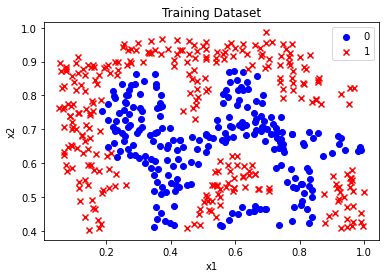

In [6]:
plot_dataset('Training Dataset', training_features, training_target)

## Plot Validation Dataset

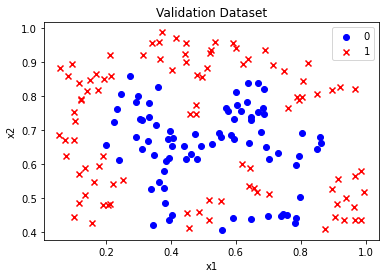

In [7]:
plot_dataset('Validation Dataset', validation_features, validation_target)

## Plot Testing Dataset

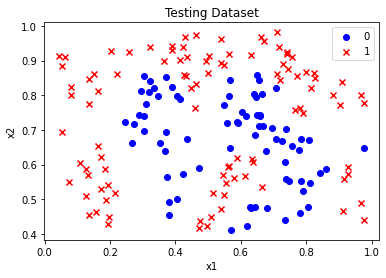

In [8]:
plot_dataset('Testing Dataset', testing_features, testing_target)

# Train Using Linear Kernel

## Find Best C Value

In [9]:
max_f1_score = 0
best_c_value = 0.01
for C in arange(0.01, 10, 0.01):
  model = svm.LinearSVC(C=C)
  model.fit(training_features, training_target)

  predicted_target = model.predict(validation_features)

  current_f1_score = f1_score(validation_target, predicted_target)

  if current_f1_score > max_f1_score:
    best_c_value = C
    max_f1_score = current_f1_score

print("Best C:", best_c_value)
print("Best F1 Score:", max_f1_score)

model = svm.LinearSVC(C=best_c_value)
model.fit(training_features, training_target)
print('\n')

Best C: 0.02
Best F1 Score: 0.6584362139917695




## Analyse Training Dataset

F1 Score:  0.6976744186046512
Accuracy:  0.5725338491295938
ROC AUC score:  0.5322279839883551



Classification Report               precision    recall  f1-score   support

           0       0.55      0.18      0.27       229
           1       0.58      0.89      0.70       288

    accuracy                           0.57       517
   macro avg       0.56      0.53      0.48       517
weighted avg       0.57      0.57      0.51       517



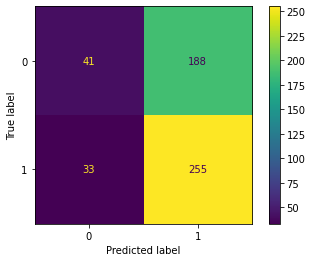

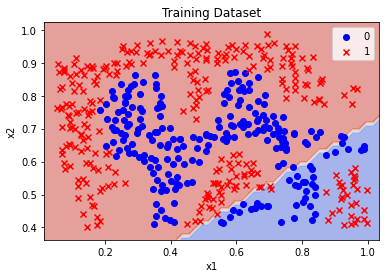

In [10]:
print_analytics(model, training_features, training_target)
plot_confusion_matrix(model, training_features, training_target, values_format='.0f')

plot_decision_boundary(model, training_features, training_target)
plot_dataset('Training Dataset', training_features, training_target)

plt.show()

## Analyse Validation Dataset

F1 Score:  0.6584362139917695
Accuracy:  0.5202312138728323
ROC AUC score:  0.4888230541341233



Classification Report               precision    recall  f1-score   support

           0       0.42      0.13      0.19        79
           1       0.54      0.85      0.66        94

    accuracy                           0.52       173
   macro avg       0.48      0.49      0.43       173
weighted avg       0.48      0.52      0.45       173



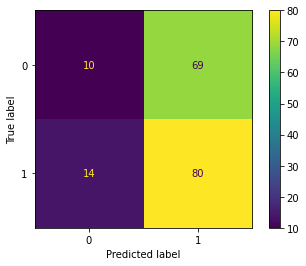

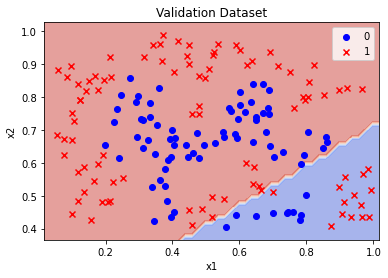

In [11]:
print_analytics(model, validation_features, validation_target)
plot_confusion_matrix(model, validation_features, validation_target)

plot_decision_boundary(model, validation_features, validation_target)
plot_dataset('Validation Dataset', validation_features, validation_target)

plt.show()

## Analyse Testing Dataset

F1 Score:  0.7389558232931727
Accuracy:  0.6242774566473989
ROC AUC score:  0.5760544217687076



Classification Report               precision    recall  f1-score   support

           0       0.73      0.21      0.33        75
           1       0.61      0.94      0.74        98

    accuracy                           0.62       173
   macro avg       0.67      0.58      0.53       173
weighted avg       0.66      0.62      0.56       173



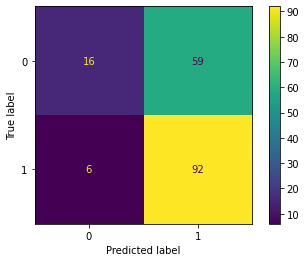

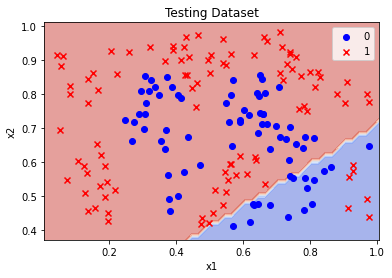

In [12]:
print_analytics(model, testing_features, testing_target)
plot_confusion_matrix(model, testing_features, testing_target)

plot_decision_boundary(model, testing_features, testing_target)
plot_dataset('Testing Dataset', testing_features, testing_target)

plt.show()

# Train Using Gaussian Kernel

## Find Best C and Gamma Values

### Using GridSearchCV

F1 Score:  0.9979123173277662
Accuracy:  0.9976825028968713
ROC AUC score:  0.9979166666666667



Classification Report               precision    recall  f1-score   support

           0       0.99      1.00      1.00       383
           1       1.00      1.00      1.00       480

    accuracy                           1.00       863
   macro avg       1.00      1.00      1.00       863
weighted avg       1.00      1.00      1.00       863



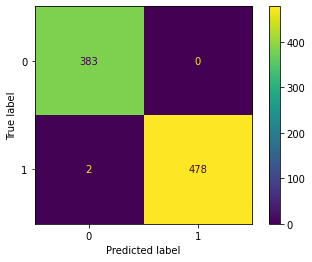

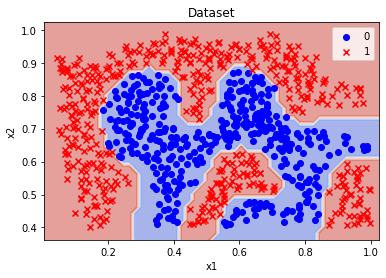

In [13]:
model = GridSearchCV(svm.SVC(), {
  'C': arange(1, 10, 1),
  'gamma': arange(80, 100, 0.1),
  'kernel': ['rbf']
}, cv=2)

model.fit(features, target)
print_analytics(model, features, target)
plot_confusion_matrix(model, features, target, values_format='.0f')

plot_decision_boundary(model, features, target)
plot_dataset('Dataset', features, target)

plt.show()

### Using For Loops

In [14]:
best_gamma = 80.0
best_c_value = 1
max_f1_score = 0

for c in arange(1, 10, 1):
  for gamma in arange(80.0, 100.0, 0.1):
    model = svm.SVC(C=c, gamma=gamma)
    model.fit(training_features, training_target)

    predicted_target = model.predict(validation_features)

    current_f1_score = f1_score(validation_target, predicted_target)

    if current_f1_score > max_f1_score:
      best_c_value = c
      best_gamma = gamma
      max_f1_score = current_f1_score

print('Best F1 Score:', max_f1_score)
print('Best C Value:', best_c_value)
print('Best Gamma Value:', best_gamma)

model = svm.SVC(C=best_c_value, gamma=best_gamma)
model.fit(training_features, training_target)

print('\n')

Best F1 Score: 1.0
Best C Value: 1
Best Gamma Value: 80.49999999999997




## Analyse Training Dataset

F1 Score:  1.0
Accuracy:  1.0
ROC AUC score:  1.0



Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       288

    accuracy                           1.00       517
   macro avg       1.00      1.00      1.00       517
weighted avg       1.00      1.00      1.00       517



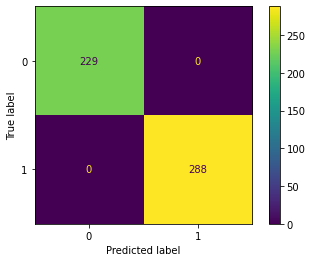

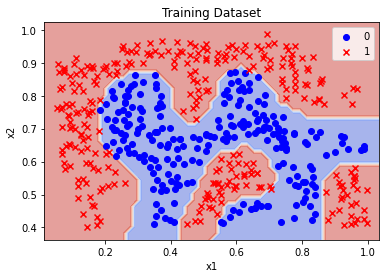

In [15]:
print_analytics(model, training_features, training_target)
plot_confusion_matrix(model, training_features, training_target, values_format='.0f')

plot_decision_boundary(model, training_features, training_target)
plot_dataset('Training Dataset', training_features, training_target)

plt.show()

## Analyse Validation Dataset

F1 Score:  1.0
Accuracy:  1.0
ROC AUC score:  1.0



Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        94

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



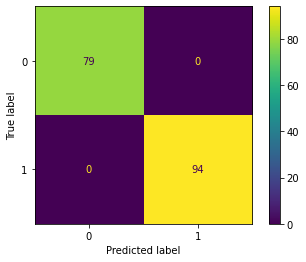

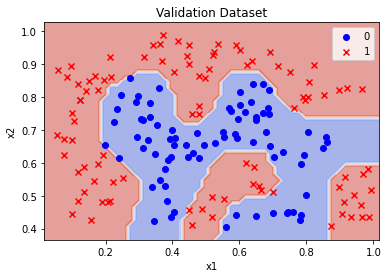

In [16]:
print_analytics(model, validation_features, validation_target)
plot_confusion_matrix(model, validation_features, validation_target)

plot_decision_boundary(model, validation_features, validation_target)
plot_dataset('Validation Dataset', validation_features, validation_target)

plt.show()

## Analyse Testing Dataset

F1 Score:  0.9849246231155778
Accuracy:  0.9826589595375722
ROC AUC score:  0.98



Classification Report               precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.97      1.00      0.98        98

    accuracy                           0.98       173
   macro avg       0.99      0.98      0.98       173
weighted avg       0.98      0.98      0.98       173



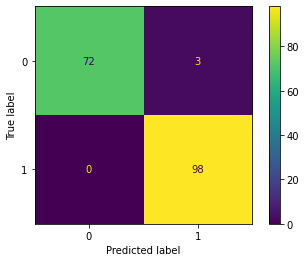

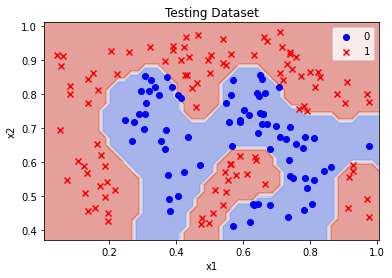

In [17]:
print_analytics(model, testing_features, testing_target)
plot_confusion_matrix(model, testing_features, testing_target)

plot_decision_boundary(model, testing_features, testing_target)
plot_dataset('Testing Dataset', testing_features, testing_target)

plt.show()